In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


In [112]:
X = np.linspace(0,1,100)
X.shape

(100,)

In [113]:
y_actual =  np.sin(np.pi*X)**2
y_actual.shape
X = X.reshape(-1,1)
X.shape

(100, 1)

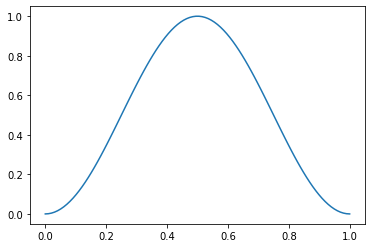

In [114]:
plt.plot(X,y_actual)

In [115]:
noise = np.random.normal(0, 0.08, 100)
y = y_actual + noise
y.shape

(100,)

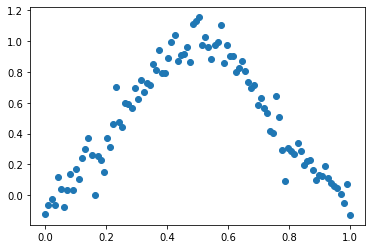

In [116]:
plt.scatter(X,y)

In [158]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=20)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X, y)


Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

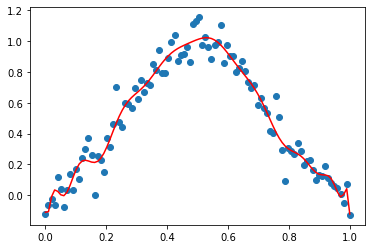

In [159]:
y_pred = pipeline.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred,color="red")


In [162]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=20)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

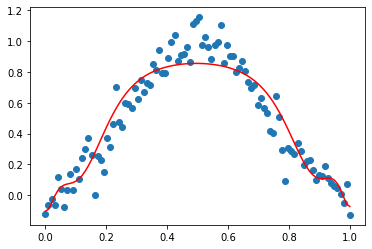

In [163]:
y_pred = ridge_pipe.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred,color="red")